# CSST主巡天Cycle1模拟数据说明  
## A Quick Start
nan.li at nao.cas.cn  
jdli at nao.cas.cn  
  
  
Cycle 3的仿真数据共包含多色成像和无缝光谱两部分数据，其中多色成像部分又包含了两组仿真，即是否添加引力透镜的剪切信号。  
数据文件包含了对应10平方度内500个pointing仿真的独立目录，即Cycle-3-SimuData/CSST_shearOFF/MSC_0000***. 
1. 多色成像  
根目录:        /share/Cycle-3-SimuData/multipleBandsImaging/  
不包含透镜剪切：/share/Cycle-3-SimuData/multipleBandsImaging/CSST_shearOFF    
包含透镜剪切:   /share/Cycle-3-SimuData/multipleBandsImaging/CSST_shearON  
数据文件:  
图像：MSC_2103040093000_0000***_<chipID>_raw.fits   
源表：MSC_2103040093000_0000***_<chipID>.cat  
宇宙线：CosmicRay_<chipID>.fits  
    
2. 无缝光谱（不包含透镜剪切)
无缝光谱模拟：./CSST_shearOFF
无缝光谱对应图像：./CSST_shearOFF_IMG
数据文件：
光谱: ./CSST_shearOFF/MSC_2103040093000_0000***_<chipID>_raw.fits  
源表: ./CSST_shearOFF/MSC_2103040093000_0000***_<chipID>.cat  
宇宙线: ./CSST_shearOFF/CosmicRay_<chipID>.fits  
对应图像：  
./CSST_shearOFF_IMG/MSC_2103040093000_0000***_<chipID>_raw_img.fits


In [1]:
from astropy.table import Table

%matplotlib inline
%config InlineBackend.figure_format = "retina"
import os
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import rcParams
rcParams["font.size"] = 14

# 数据产品  

## a.多色成像

In [3]:
shear_type = ['ON', 'OFF']

rootpath = '/share/Cycle-3-SimuData/multipleBandsImaging/CSST_shearOFF/MSC_0000'

pointID = '000' # 000-499
chipID = '06' # 06-25


fname = rootpath + pointID +'/'+'MSC_210304093000_0000'+pointID + '_'+ chipID + '_raw.fits'
print(fname)
# os.path.isfile(fname)


/share/Cycle-3-SimuData/multipleBandsImaging/CSST_shearOFF/MSC_0000000/MSC_210304093000_0000000_06_raw.fits


In [4]:
"""Load all multiple Bands Imaging"""


def MBI_path(rootpath, shear='ON'):
    
    fname_list = []
    if shear=='ON':
        rootpath = rootpath + 'CSST_shearON/MSC_0000'
    elif shear=='OFF':
        rootpath = rootpath + 'CSST_shearOFF/MSC_0000'
    
    for pointID in range(499):
        pointID = '{0:03}'.format(pointID)
        
        for chipID in range(6,25):
            chipID = '{0:02}'.format(chipID)
    
            fname = rootpath + pointID +'/'+\
                    'MSC_210304093000_0000'+\
                    pointID + '_'+ chipID + '_raw.fits'
            if os.path.isfile(fname):
                fname_list += [fname]
            else:
                pass
    
    return fname_list


shear_type = ['ON', 'OFF']
rootpath = '/share/Cycle-3-SimuData/multipleBandsImaging/'

fname_list = MBI_path(rootpath, shear='OFF')
print(len(fname_list))

8483


### 头文件说明  

头文件中包含了Primary header 和 Extension header两部分，  
Primary header 定义了共性的部分，Extension header部分针对不同的滤光片不同CCD进行定义，  
头文件定义示例如下

In [5]:
hdul = fits.open(fname_list[1000])

print(hdul.info())
print("Primary header: \n")

hdul[0].header

Filename: /share/Cycle-3-SimuData/multipleBandsImaging/CSST_shearOFF/MSC_0000058/MSC_210304093000_0000058_22_raw.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   ()      
  1  RAW,22      1.0 ImageHDU        55   (9216, 9232)   int16 (rescales to uint16)   
None
Primary header: 



SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2020-01-01'         / Date this file was written                     
FILENAME= 'MSC_210304093000_0000058_22_raw' / Name of file                      
FILETYPE= 'zero    '           / Type of data                                   
COMMENT ==================================================================      
COMMENT Target information                                                      
COMMENT ==================================================================      
EXPNUM  =           99999999.0 / Exposure sequence number                       
TARGNAME= 'CSST_   '           / Observation title                              
RADECSYS= 'FK5     '        

In [6]:
hdul[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
BSCALE  =                    1                                                  
BZERO   =                32768                                                  
NAXIS1  =                 9216                                                  
NAXIS2  =                 9232                                                  
EXTNAME = 'RAW,22  '           / Extension name                                 
EXTVER  =                  1.0 / The ID number                                  
OBSID   = 'CSST.20200101T000000' / Observation ID                               
COMMENT ====================

## 数据示例

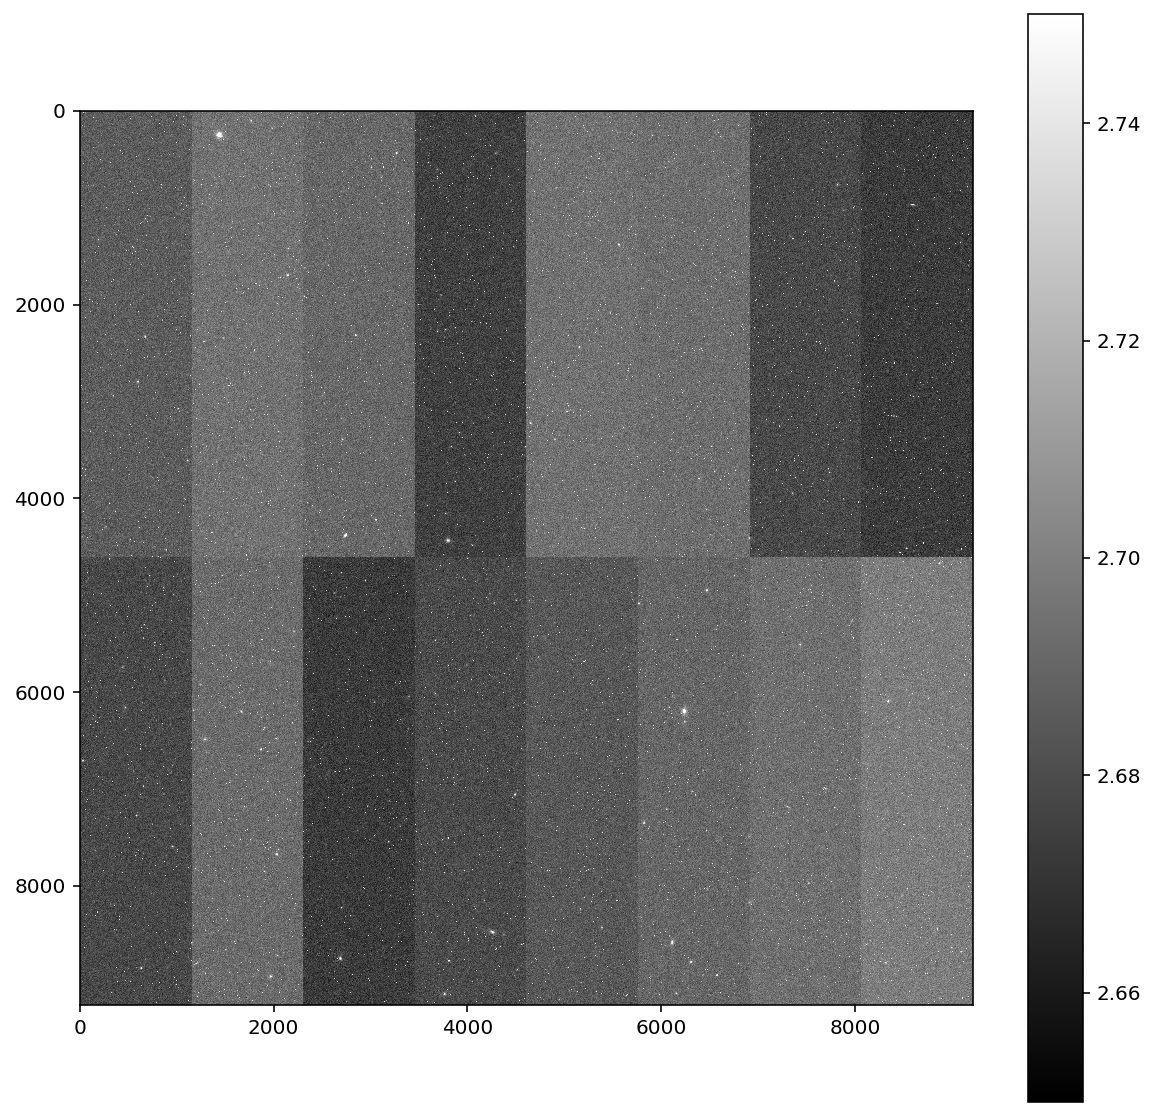

In [7]:
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
# ax = plt.subplot(projection=WCS(hdul[0].header))
ax =  plt.subplot()
img = ax.imshow(np.log10(hdul[1].data), 
#           norm=colors.LogNorm(), 
          vmin=2.65, vmax=2.75,
          cmap='gray')
plt.colorbar(img)
# ax.set_xlabel('RA'); ax.set_ylabel('DEC');

# 无缝光谱数据

In [8]:
"""Pre-Load all slitless Spectroscopy Imaging"""


def SSI_path(rootpath):
    
    fname_list = []
    
    for pointID in range(499):
        pointID = '{0:03}'.format(pointID)
        
        for chipID in range(1,30):
            chipID = '{0:02}'.format(chipID)
    
            fname = rootpath  +'MSC_0000'+ pointID + "/"  +\
        'MSC_210304093000_0000'+ pointID + '_'+ chipID + '_raw_img.fits'
            if os.path.isfile(fname):
                fname_list += [fname]
            else:
                pass
    
    return fname_list

rootpath = '/share/Cycle-3-SimuData/slitlessSpectroscopy/CSST_shearOFF_IMG/'

SS_fname_list = SSI_path(rootpath)

print(len(SS_fname_list))

5489


In [9]:
hdul = fits.open(SS_fname_list[1000])

print(hdul.info())
print("Primary header: \n")

hdul[0].header

Filename: /share/Cycle-3-SimuData/slitlessSpectroscopy/CSST_shearOFF_IMG/MSC_0000090/MSC_210304093000_0000090_29_raw_img.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   ()      
  1  RAW,29      1.0 ImageHDU        55   (9216, 9232)   int16 (rescales to uint16)   
None
Primary header: 



SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2020-01-01'         / Date this file was written                     
FILENAME= 'MSC_210304093000_0000090_29_raw' / Name of file                      
FILETYPE= 'zero    '           / Type of data                                   
COMMENT ==================================================================      
COMMENT Target information                                                      
COMMENT ==================================================================      
EXPNUM  =           99999999.0 / Exposure sequence number                       
TARGNAME= 'CSST_   '           / Observation title                              
RADECSYS= 'FK5     '        

In [10]:
hdul[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
BSCALE  =                    1                                                  
BZERO   =                32768                                                  
NAXIS1  =                 9216                                                  
NAXIS2  =                 9232                                                  
EXTNAME = 'RAW,29  '           / Extension name                                 
EXTVER  =                  1.0 / The ID number                                  
OBSID   = 'CSST.20200101T000000' / Observation ID                               
COMMENT ====================

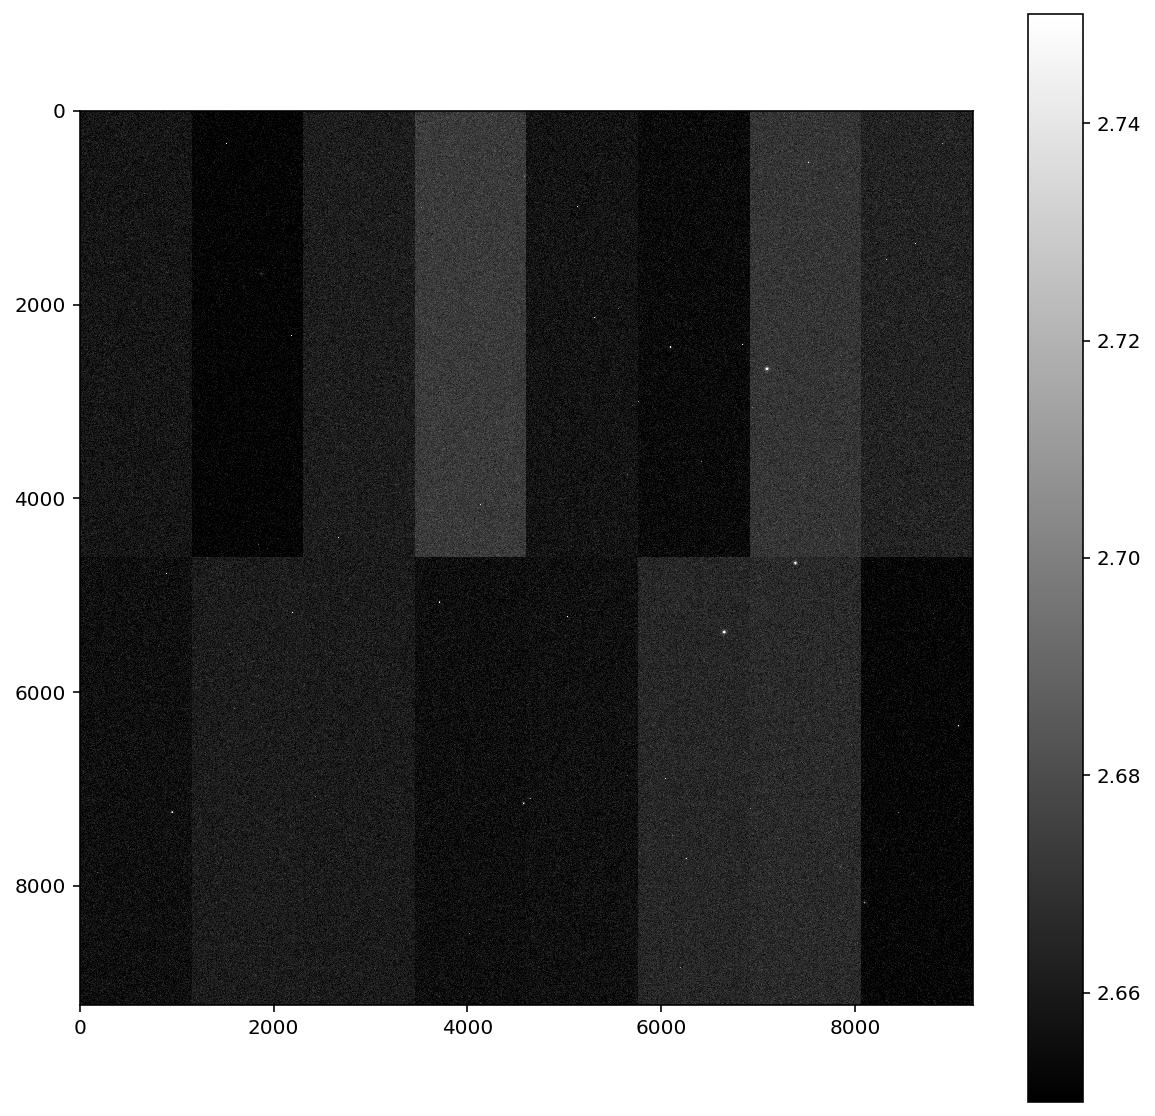

In [11]:
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
# ax = plt.subplot(projection=WCS(hdul[0].header))
ax =  plt.subplot()
img = ax.imshow(np.log10(hdul[1].data), 
#           norm=colors.LogNorm(), 
          vmin=2.65, vmax=2.75,
          cmap='gray')
plt.colorbar(img)
# ax.set_xlabel('RA'); ax.set_ylabel('DEC');

## 展示一个指向的输出数据

Note: `pip install reproject` or  
`conda install -c astropy reproject`

In [20]:
"""select field pointing"""


def SSI_path(rootpath):
    
    fname_list = []
    
    for pointID in range(499):
        pointID = '{0:03}'.format(pointID)
        
        for chipID in range(1,30):
            chipID = '{0:02}'.format(chipID)
    
            fname = rootpath  +'MSC_0000'+ pointID + "/"  +\
        'MSC_210304093000_0000'+ pointID + '_'+ chipID + '_raw_img.fits'
            if os.path.isfile(fname):
                fname_list += [fname]
            else:
                pass
    
    return fname_list

rootpath = '/share/Cycle-3-SimuData/slitlessSpectroscopy/CSST_shearOFF_IMG/'

def point2img(ipoint, 
              MBI_path='/share/Cycle-3-SimuData/multipleBandsImaging/', 
              SSI_path='/share/Cycle-3-SimuData/slitlessSpectroscopy/CSST_shearOFF_IMG/',
              shear='OFF'
             ):
    pointID = '{0:03}'.format(ipoint)
    fname_list = []
    
    # Create multipleBandsImaging filename list
    
    if shear=='ON':
        MBI_path = MBI_path + 'CSST_shearON/MSC_0000'
    elif shear=='OFF':
        MBI_path = MBI_path + 'CSST_shearOFF/MSC_0000'

    for chipID in range(6,26):
        chipID = '{0:02}'.format(chipID)
        MBI_fname = MBI_path + pointID +'/'+\
            'MSC_210304093000_0000'+\
            pointID + '_'+ chipID + '_raw.fits'
        
        if os.path.isfile(MBI_fname):
            fname_list += [MBI_fname]
#         else:
#             print(MBI_fname)
        
    # Create slitlessSpectroscopy filename list
    
    for chipID in range(1,31):
        chipID = '{0:02}'.format(chipID)
    
        SSI_fname = SSI_path  +'MSC_0000'+ pointID + "/"  +\
        'MSC_210304093000_0000'+ pointID + '_'+ chipID + '_raw_img.fits'
        if os.path.isfile(SSI_fname):
            fname_list += [SSI_fname]
            
    return fname_list


ipoint = 50
point_fnamelist = point2img(ipoint)
print(len(point_fnamelist))

30


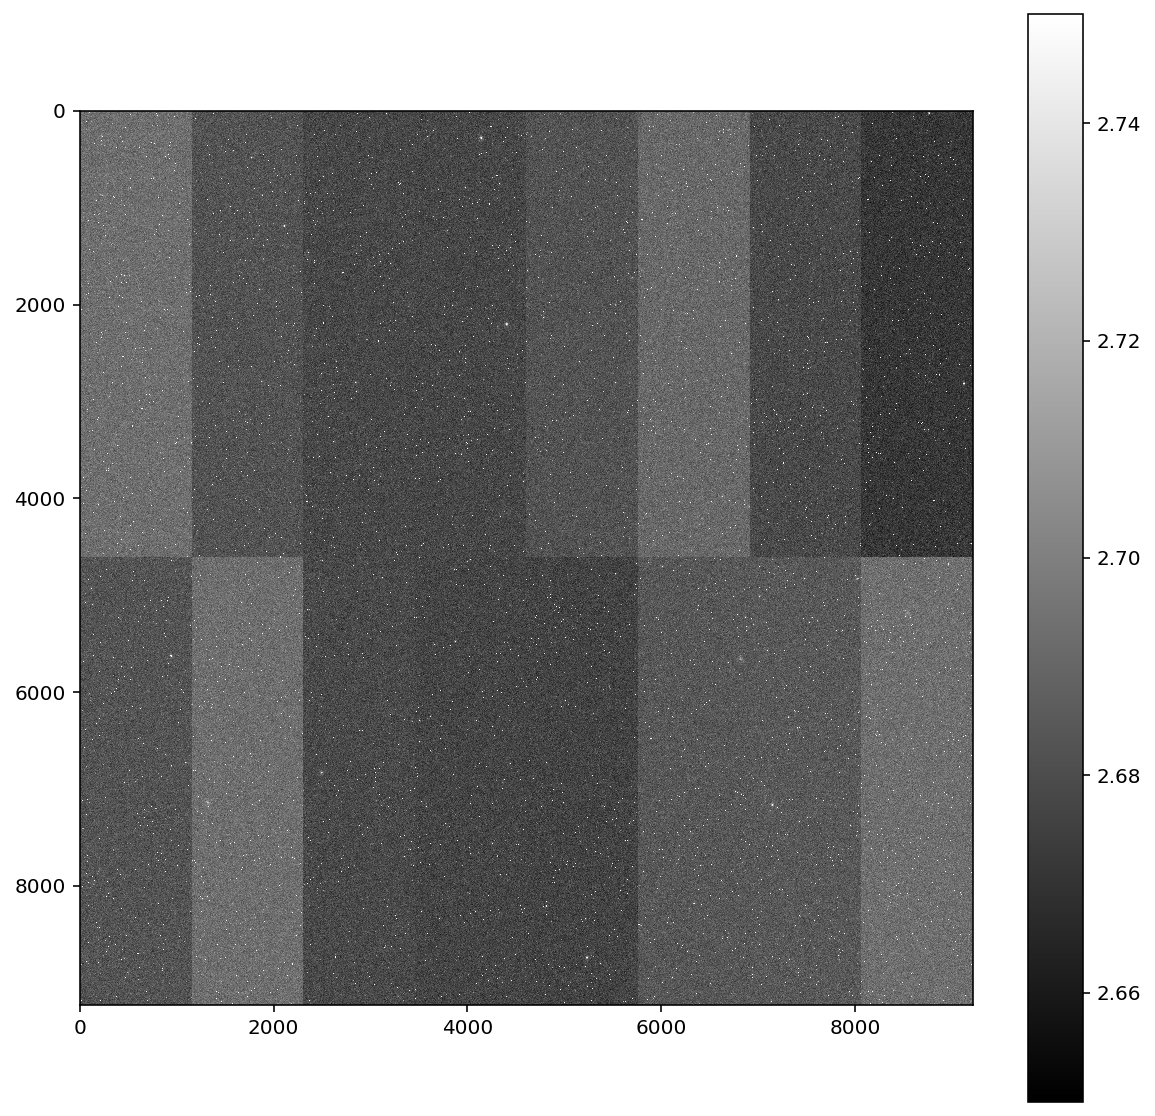

In [21]:
%matplotlib inline

hdul = fits.open(point_fnamelist[2])

fig = plt.figure(figsize=(10, 10))
# ax = plt.subplot(projection=WCS(hdul[0].header))
ax =  plt.subplot()
img = ax.imshow(np.log10(hdul[1].data), 
#           norm=colors.LogNorm(), 
          vmin=2.65, vmax=2.75,
          cmap='gray')
plt.colorbar(img)



In [23]:
from reproject.mosaicking import reproject_and_coadd, find_optimal_celestial_wcs
from reproject import reproject_interp, reproject_exact

def parse_hdu(fits_name):
    hdulist = fits.open(fits_name)
    if len(hdulist) == 1:
        return hdulist
    
    elif len(hdulist) == 2:
        primary_hdu, img_hdu = hdulist
        return img_hdu
    
    else:
        raise NameError('wrong hdu!')
    return None

# Spec_hdus = [parse_hdu(Spec_real_path[i]) for i in range(len(Spec_real_path))]
# Img_hdus = [parse_hdu(Img_real_path[i]) for i in range(len(Img_hdus))]
hdus = [parse_hdu(point_fnamelist[_]) for _ in range(len(point_fnamelist))]

wcs_out, shape_out = find_optimal_celestial_wcs(hdus)
# print(shape_out)

array, footprint = reproject_and_coadd(hdus, wcs_out, shape_out=shape_out,
                                       reproject_function=reproject_exact)

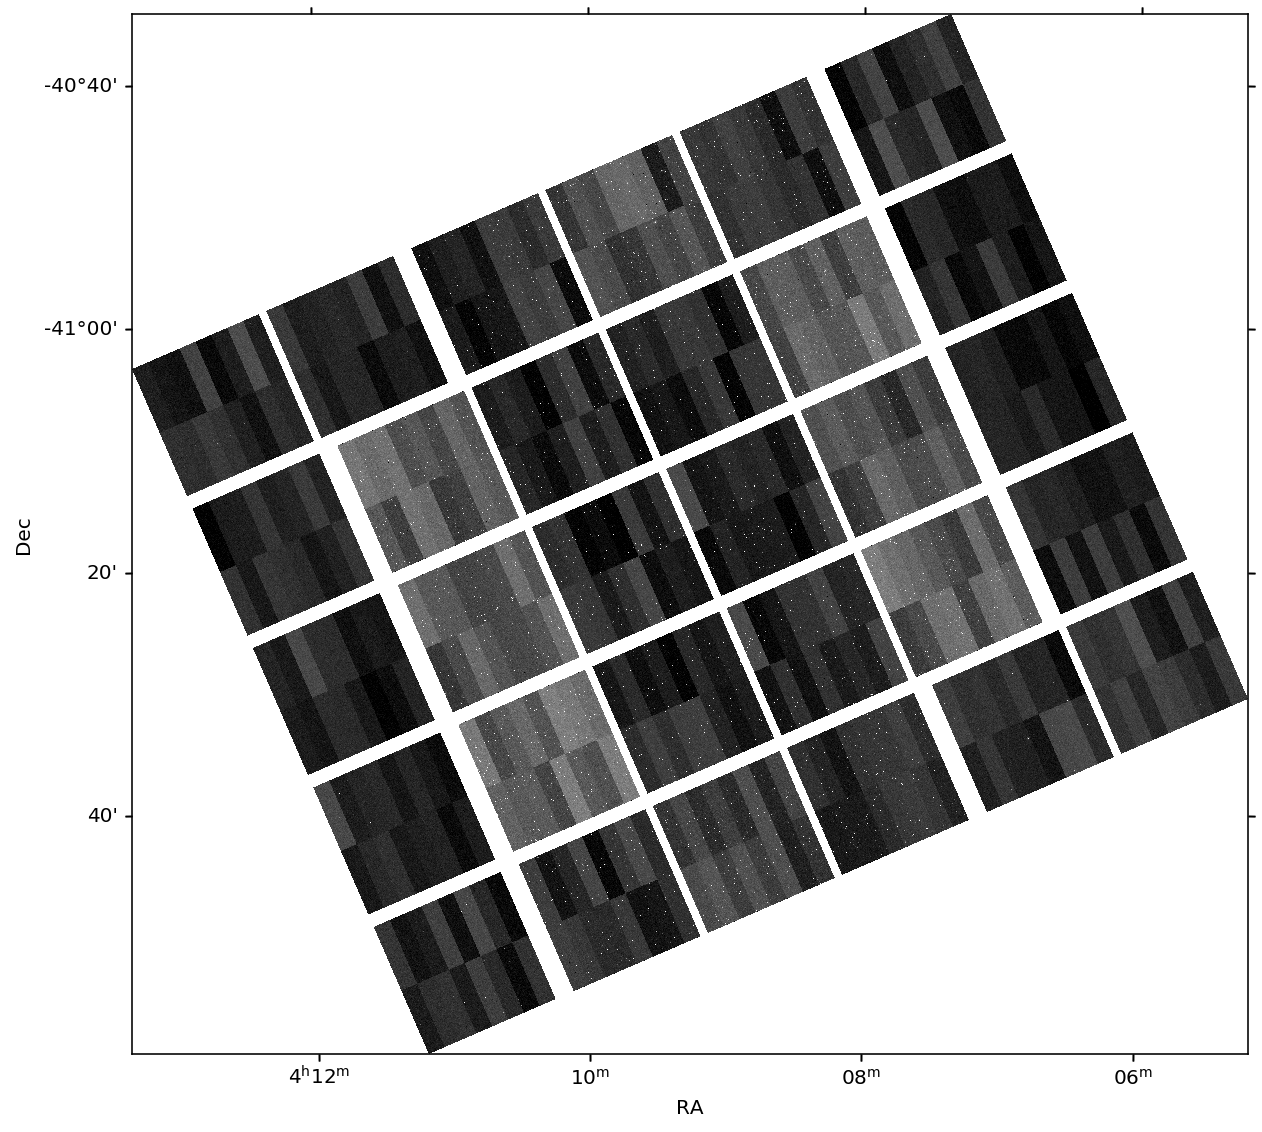

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_out)
ax.imshow(np.log10(array), 
          origin='lower', 
          aspect='equal', 
          vmin=2.65, vmax=2.75,
          cmap='gray')

#           norm=colors.LogNorm()
ax.set_xlabel(r'RA'); ax.set_ylabel(r'Dec');